# Red Wine Quality

Kagle data set [Red Wine](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) is used for analysis. 

Bellow written introduction about the data is from Publications related to this data set: 

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

*This work will consider vinho verde, a unique product from the Minho (northwest) region of Portugal. The data were collected from May/2004 to February/2007 using only protected designation of origin samples that were tested at the official certification entity. The data were
recorded by a computerized system (iLab), which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis. Each entry denotes a given test (analytical or sensory) and the final database was exported into a single sheet (.csv).*

*During the preprocessing stage, the database was transformed in order to include a **distinct wine sample** (with all tests) per row. To avoid discarding examples, only the most common physicochemical tests were selected.*

## Project Goal

The purpose of this project is to analyze the Red Wine Quality dataset and identify which variables influence perceived wine quality the most by fitting a statistical model. Worth to mention, that focus here will be to create explanatory model (to understanding factors that influence wine quality) rather than predictive model.

Dataset has 11 input variables (based on physicochemical tests):
1. **Fixed acidity** - Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
2. **Volatile acidity** - The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
3. **Citric acid** - Found in small quantities, citric acid can add 'freshness' and flavor to wines.
4. **Residual sugar** - The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
5. **Chlorides** - The amount of salt in the wine.
6. **Free sulfur dioxide** - The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. **Total sulfur dioxide** - Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
8. **Density** - The density of wine is close to that of water depending on the percent alcohol and sugar content.
9. **PH** - Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
10. **Sulphates** - A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
11. **Alcohol** - The percent alcohol content of the wine.

and 1 output variable (based on sensory data):

12. **Quality** (score between 0 and 10)

## 0. Dataset Overview

For initial dataset overview 
- sample size
- nulls
- data types
- duplicates

will be checked. Outliers will be analysed in EDA part.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import spearmanr
from sklearn.preprocessing import PowerTransformer
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import zscore
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(df.info(), end="\n\n")
print("Dataset has", df.shape[0], "observations and", df.shape[1], "features.")
print("Dataset has", df.duplicated().sum(), "duplicated observations.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Dataset has 1599 observations and 12 features.
Dataset has 240 duplicated observations.


In [4]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


### Overview Summary

- Dataset has 1599 observations and 12 features. 11 of them are input variables, 1 - output.
- Dataset has no nulls.
- Data types of features are optimal for information stored in them. Float for input variables and integer for output variable.
- Dataset has 240 duplicates. From dataset description *"it includes a **distinct wine sample** (with all tests) per row"*. This information allows to conclude, that duplicated values are not because of mistake, but rather exact same wine was tested several times or it was different wine but with exact same physicochemical and quality features. As there is no clear evidence that same wine was tested - assumption is made that it was different wines and duplicated values will be kept in dataset.

## 1. Hypothesis

Out of EDA following hypothesis is formulated: 

**Wines with higher alcohol content tend to have higher perceived quality.**

To test this null hipothesis (with $\alpha = 0.05$) will be defined as follows:

$H_0: Coef = 0$ - Alcohol content has no significant relationship with wine quality

$H_a: Coef \neq 0 $ - Alcohol content has significant relationship with wine quality.

## 2. Exploratory Data Analysis

### 2.1. Dataset split

Dataset will be split up to training and test data sets. During split stratification will be done by dependent variable **quality**.

In [5]:
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["quality"]
)

X_train = df_train.drop(columns=["quality"]).reset_index(drop=True)
y_train = df_train["quality"].reset_index(drop=True)

X_test = df_test.drop(columns=["quality"])
y_test = df_test["quality"]

Further analysis will be done on training data.

### 2.2. Dependent variable - **Quality**

In [6]:
fig = px.histogram(
    df_train,
    x="quality",
    marginal="box",
    title=f"Distribution of <b>Quality</b>",
    height=400,
)

fig.add_vline(x=df_train["quality"].mean(), line_dash="dash", line_color="black")
fig.add_annotation(
    x=df_train["quality"].mean(), y=1.1, yref="paper", text="Mean", showarrow=False
)

fig.show()

stats_row = df_train["quality"].describe().to_frame().T.round(2)
print(stats_row.to_string(index=True))

          count  mean   std  min  25%  50%  75%  max
quality  1279.0  5.64  0.81  3.0  5.0  6.0  6.0  8.0


- Description: The quality variable is a sensory-based score, usually rated by wine tasters, that reflects the overall perception of the wine.
- Usual Range: Ranges from 0 to 10 in theory, though most wines are likely to score between 3 and 8 in practice.
- Influencing Factors: Quality scores typically depend on a combination of factors, including acidity, alcohol content, pH, and sulfur dioxide levels. Tasters look for a balance of aroma, flavor, mouthfeel, and aftertaste, which physicochemical properties can influence to varying degrees.

**Data insights:**
- **Quality** is Normally distributed with very slight right skeweness.
- Majority of wines from this dataset have Medium (5-6) level of **Quality** with significantly lower quantity for Low (3-4) and High (7-8) **Quality** wines.

### 2.3. Independent variables

Function will be created for consistent visualisation and overview of independent variables.

In [7]:
def overview_plot(df, name, measurement="", title_case=True):
    """
    Generates a histogram with a box plot and descriptive statistics.

    This function creates a Plotly histogram showing the distribution of a feature
    with `quality` as the count-based hue. A vertical line marks the mean, and
    descriptive statistics are printed below the plot.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to be plotted.
    name : str
        The column name of the feature to visualize.
    measurement : str, optional
        A unit or description for the feature (e.g., "g/L", "percentage").
        Defaults to an empty string.
    title_case : bool, optional
        If True, converts the feature name to title case in the plot title.
        Defaults to True.

    Outputs
    -------
    - A Plotly histogram with a box plot and mean annotation.
    - A table of descriptive statistics printed to the console.

    """
    title_name = name.title() if title_case else name
    fig = px.histogram(
        df,
        x=name,
        y="quality",
        marginal="box",
        histfunc="count",
        color="quality",
        category_orders={"quality": [8, 7, 6, 5, 4, 3]},
        title=f"Distribution of <b>{title_name}</b>",
        labels={name: title_name + ", " + measurement},
    )

    fig.add_vline(x=df[name].mean(), line_dash="dash", line_color="black")
    fig.add_annotation(
        x=df[name].mean(),
        y=1.1,
        yref="paper",
        text=f"Mean: {df[name].mean():.2f}",
        showarrow=False,
    )

    fig.show()

    stats_row = df[name].describe().to_frame().T.round(2)
    print(stats_row.to_string(index=True))

#### 2.3.1. Fixed Acidity

In [8]:
overview_plot(df_train, "fixed acidity", "g/L")

                count  mean  std  min  25%  50%  75%   max
fixed acidity  1279.0  8.31  1.7  4.6  7.1  7.9  9.3  15.9


- Description: Primarily composed of tartaric acid and malic acid, fixed acidity represents non-volatile acids that do not evaporate during fermentation. Fixed acidity contributes to the overall acidity and stability of the wine.
- Usual Range: Typically between 4 - 10 g/L for most wines.
- Impact on Quality: Acidity is essential for wine balance and aging potential. Higher acidity tends to improve freshness, while very high levels can create an overly tart taste. In red wines, moderate acidity enhances flavor and longevity.

**Data insights:**
- There is no clear visible difference in **Fixed Acidity** distribution for each **Quality** level.
- Distribution of **Fixed Acidity** is somewhat Normal with right skewness.
- There are outliers on the higher side for Mediume **Quality** (5-6) wine.

#### 2.3.2. Volatile Acidity

In [9]:
overview_plot(df_train, "volatile acidity", "g/L")

                   count  mean   std   min  25%   50%   75%   max
volatile acidity  1279.0  0.53  0.18  0.12  0.4  0.52  0.64  1.58


- Description: This primarily measures acetic acid, which is volatile and can evaporate easily. In high concentrations, it imparts an unpleasant vinegar-like aroma.
- Usual Range: Typically between 0.2 - 1.2 g/L. Levels above 1.2 g/L can be considered a defect.
- Impact on Quality: Moderate volatile acidity can add complexity to a wine's aroma, but excessive levels signal spoilage or bacterial contamination. Wines with too much acetic acid are often perceived as lower quality.

**Data insights:**
- It is clear that wines with higher **Volatile Acidity** tend to have lower **Quality**.
- Distribution is close to Normal with slight right skeweness and some outlieries on the higher side.

#### 2.3.3. Citric Acid

In [10]:
overview_plot(df_train, "citric acid", "g/L")

              count  mean   std  min  25%   50%   75%  max
citric acid  1279.0  0.27  0.19  0.0  0.1  0.26  0.43  1.0


- Description: Citric acid is often present in small amounts and adds a hint of freshness and zestiness to the wine. Its presence is naturally minimal in red wines.
- Usual Range: Usually between 0 - 1 g/L in most wines.
- Impact on Quality: Although small in quantity, citric acid contributes to perceived freshness. Wines with too little citric acid can taste flat, while higher levels are generally unusual in red wines and may indicate certain additives or fermentation styles.

**Data insights:**
- Distribution is closer to Uniform than Normal with right side tail.
- There only several outliers.
- Wines with higher **Citric Acid** tend to have higher **Quality**.

#### 2.3.4. Residual Sugar

In [11]:
overview_plot(df_train, "residual sugar", "g/L")

                 count  mean   std  min  25%  50%  75%   max
residual sugar  1279.0  2.54  1.38  0.9  1.9  2.2  2.6  15.4


- Description: This is the sugar remaining after fermentation. Most red wines are dry, with little residual sugar, while sweet wines have higher levels.
- Usual Range: Generally 0.1 - 3 g/L in dry wines; up to 45 g/L or more in sweet wines.
- Impact on Quality: In red Vinho Verde, residual sugar is usually very low. It can balance acidity in higher amounts, but too much sugar in red wine can detract from typical flavor profiles, which emphasize acidity, tannins, and complexity over sweetness.

**Data insights:**
- Distribution is Normal with multiple outliers on the higher side.
- There is no clear differences in **Residual Sugar** for different **Quality** wines.
- **Residual sugar** numbers indicate that dataset potentially has not only dry wines.

#### 2.3.5. Chlorides

In [12]:
overview_plot(df_train, "chlorides", "g/L")

            count  mean   std   min   25%   50%   75%   max
chlorides  1279.0  0.09  0.05  0.01  0.07  0.08  0.09  0.61


- Description: Chlorides represent the salt content in wine, which can originate from the soil, winemaking additives, or environmental conditions.
- Usual Range: Typically 0.01 - 0.2 g/L.
- Impact on Quality: Moderate chloride levels can enhance mouthfeel, but higher levels can cause an undesirable salty taste. Elevated chloride levels can also indicate contamination or poor quality control.

**Data insights:**
- Distribution is Normal with multiple outliers on the higher side.
- There is no clear differences in **Chlorides** for different **Quality** wines, although higher **Quality** wines tend to have slightly lower level of **Chloride**.

#### 2.3.6. Free Sulfur Dioxide

In [13]:
overview_plot(df_train, "free sulfur dioxide", "ppm")

                      count   mean    std  min  25%   50%   75%   max
free sulfur dioxide  1279.0  16.13  10.47  1.0  7.0  14.0  22.0  68.0


- Description: Free SO₂ acts as an antimicrobial and antioxidant. It’s typically added to prevent spoilage and oxidation during winemaking.
- Usual Range: Generally 10 - 50 ppm (parts per million).
- Impact on Quality: Appropriate levels protect the wine and preserve its freshness. If levels are too low, wine may be vulnerable to spoilage; if too high, it can impart a harsh chemical odor.

**Data Insights:**
- Distribution is strongly right skewed with long tail. 
- Lower **Quality** wines (3) tend to have lower level of **Free Sulfur Dioxide**.

#### 2.3.7. Total Sulfur Dioxide

In [14]:
overview_plot(df_train, "total sulfur dioxide", "ppm")

                       count   mean    std  min   25%   50%   75%    max
total sulfur dioxide  1279.0  47.28  33.33  6.0  22.0  39.0  64.0  289.0


- Description: This includes both free and bound forms of SO₂. Total SO₂ should be controlled, as high levels can negatively affect aroma and taste.
- Usual Range: Usually 20 - 150 ppm for red wines; legally capped at around 350 ppm in most regions.
- Impact on Quality: Low to moderate levels can stabilize wine, but high levels can impair sensory qualities, producing an unpleasant smell and taste. High SO₂ is more detectable in wines with lower acidity.

**Data Insights:**
- Distribution is similar to Logarithmic distribution. 
- There is no clear differentiation of **Quality** by **Total Sulfur Dioxide**.
- There are 2 extreme outliers at 278 and 289.

#### 2.3.8. Density

In [15]:
overview_plot(df_train, "density", "g/mL")

          count  mean  std   min  25%  50%  75%  max
density  1279.0   1.0  0.0  0.99  1.0  1.0  1.0  1.0


- Description: Density reflects the wine’s mass relative to water, influenced by sugar, alcohol, and other dissolved solids.
- Usual Range: Typically 0.990 - 1.010 g/mL.
- Impact on Quality: Density can indicate residual sugar and alcohol levels. High-density values are often associated with sweeter wines, while dry wines have densities closer to water (1.000 g/mL). Density, indirectly, can inform about the wine's body and potential alcohol content.

**Data Insights:**
- Distribution is close to Normal distribution with relatively similar amount of outliers on both sides. 
- There is slight tendency for higher **Quality** wines to have lower **Density**.

#### 2.3.9. pH

In [16]:
overview_plot(df_train, "pH", "", False)

     count  mean   std   min   25%   50%  75%  max
pH  1279.0  3.31  0.15  2.74  3.21  3.31  3.4  3.9


- Description: pH measures acidity, with most wines falling between 3.0 and 4.0. It provides insight into the wine’s stability and microbial resistance.
- Usual Range: Typically 3.0 - 4.0 for most wines.
- Impact on Quality: Lower pH (3.0-3.4) is desirable in many wines for brightness and stability, while higher pH can make wines taste dull and increase susceptibility to spoilage. In red wines, pH closer to 3.3-3.5 is often preferred for balance and structure.

**Data Insights:**
- Distribution is close to Normal distribution with relatively similar amount of outliers on both sides. 
- There is slight tendency for lower (3-4) **Quality** wines to have higher **pH**.

#### 2.3.10 Sulphates

In [17]:
overview_plot(df_train, "sulphates", "g/L")

            count  mean   std   min   25%   50%   75%  max
sulphates  1279.0  0.66  0.18  0.37  0.55  0.62  0.74  2.0


- Description: Sulphates contribute to SO₂ levels and act as preservatives, enhancing antioxidant properties. They also influence mouthfeel and can impart a slightly bitter finish.
- Usual Range: Generally 0.3 - 0.8 g/L.
- Impact on Quality: Sulphates contribute to wine’s preservative qualities. Low levels may make wine prone to oxidation, while high levels can add bitterness, especially in red wines where they may interfere with tannins.

**Data Insights:**
- Distribution is close to Normal distribution right skewed, with multiple outliers on the higher side. 
- There is slight tendency for higher (7-8) **Quality** wines to have higher **Sulphates**.

#### 2.3.11. Alcohol

In [18]:
overview_plot(df_train, "alcohol", "%")

          count   mean   std  min  25%   50%   75%   max
alcohol  1279.0  10.42  1.07  8.4  9.5  10.2  11.1  14.9


- Description: Alcohol is produced during fermentation as sugars are converted by yeast. It contributes to body, warmth, and flavor complexity.
- Usual Range: Generally 8 - 15% by volume (ABV).
- Impact on Quality: Higher alcohol levels add body and complexity to red wines but can lead to imbalances if excessive, overshadowing subtle flavors. Alcohol percentage is crucial for quality and consumer preference, as it affects both sensory appeal and stability.

**Data Insights:**
- Distribution is close to Uniform, with one extremity in range 9.4-9.59%.
- There is tendency for higher (7-8) **Quality** wines to have higher **Alcohol** level.

#### Summary

- Most of indpendent variables have skewed distributions and outlieres. Before starting analysis such data has to be transformed.
- There were some visual tendencies about **Quality** relationship with **Alcohol**, **Sulphates**, **Density**, **Citric Acid**, and **Volatile Acidity**.

### 2.4. Relationship between variables

It will be checked for any visual patterns.

In [19]:
df_train["Quality"] = df["quality"]
fig = px.parallel_coordinates(
    df_train,
    dimensions=[
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
        "quality",
    ],
    color="Quality",
)
fig.update_layout(
    title={
        "text": "Relationship between variables",
        "x": 0.5,
        "xanchor": "center",
        "y": 0.95,
        "yanchor": "top",
    },
    margin=dict(t=100),
)

fig.show()

In [20]:
df_train.drop("Quality", axis=1, inplace=True)

From the visual examination high quality (7-8) wines compared to low quality (3-4) tend to have:
- Higher citric acid
- Lower volatile acidity
- Higher sulphates
- Higher alcohol

Correlation matrix will be calculated to evaluate relationship between all variables.

#### 2.4.1. Independent variables correlation

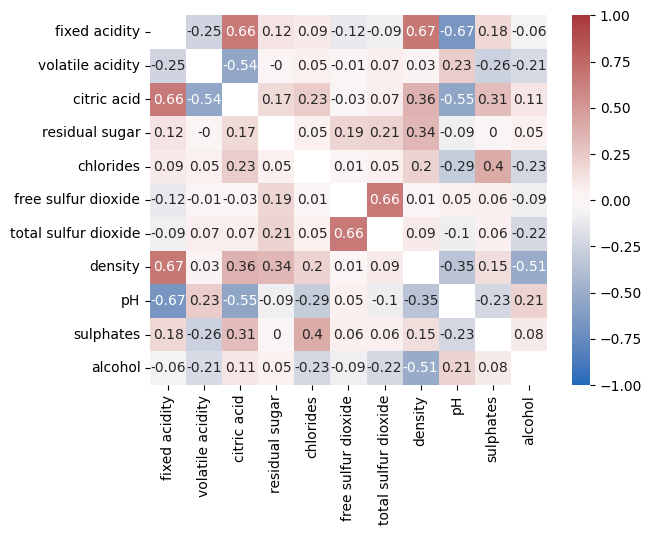

In [21]:
correlation = df_train.corr().round(2)
correlation *= 1 + np.diag(np.nan * np.ones(12))

sns.heatmap(
    data=correlation.drop("quality").drop("quality", axis=1),
    annot=True,
    center=0,
    cmap="vlag",
    vmin=-1,
    vmax=1,
)

plt.show()

Correlations between independent variables: 
- Positive between *fixed acidity* and *citric acid*: ~ 0.67
- Positive between *fixed acidity* and *density*: ~ 0.66
- Positive between *free sulfur dioxide* and *total sulfur dioxide*: ~ 0.67
- Negative between *fixed acidity* and *pH*: ~ -0.68
- Negative between *volatile acidity* and *citric acid*: ~ -0.55
- Negative between *citric acid* and *pH*: ~ -0.54
- Negative between *alcohol* and *density*: ~ -0.48

High correlations (positive or negative) between independent variables can make it difficult to identify the unique contribution of each variable. For example:
- The interplay between *fixed acidity*, *citric acid*, and *density* suggests overlapping contributions to the model.
- Similarly, the relationship between *pH* and the acid-related variables (*fixed acidity*, *citric acid*) may obscure the effect of pH alone.

#### 2.4.2. Dependend and independent variables correlation

Even though **Quality** is a number, it is categorical variable. There for - for checking correlation will be used Spearman Rank Correlation.

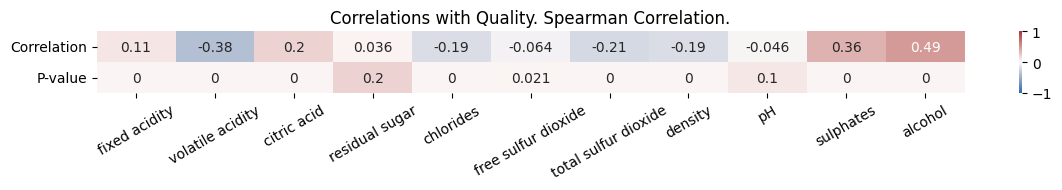

In [22]:
spearman_corr_results = {}

for column in df_train.columns:
    if column != "quality":
        corr, p_value = spearmanr(df_train[column], df_train["quality"])
        spearman_corr_results[column] = {"Correlation": corr, "P-value": p_value}

spearman_corr_results_df = pd.DataFrame(spearman_corr_results).round(3)

plt.figure(figsize=(14, 0.8))
sns.heatmap(
    spearman_corr_results_df,
    annot=True,
    cmap="vlag",
    center=0,
    vmin=-1,
    vmax=1,
)

plt.title("Correlations with Quality. Spearman Correlation.")
plt.xticks(rotation=30, ha="center")

plt.show()

Correlations between dependent variable **quality** and independent variables:
- Positive for *alcohol*: ~ 0.49
- Positive for *suplhates*: ~ 0.36
- Positive for *citric acid*: ~ 0.2
- Negative for *volatile acidity*: ~ -0.38
- Negative for *free sulfur dioxide*: ~ -0.21

P-value for **Quality** correlation with **Residual Sugar** and **pH** is higher than 0.05 which signals that theres is no significant difference from 0 for these correlation coeficients.

This matches with visual insights from Relationship between variables graph.

#### 2.4.3. Multicolinearity

**Multicollinearity** refers to a statistical phenomenon where two or more independent variables in a regression model are highly correlated with each other. This can pose challenges in estimating the individual effect of each variable on the dependent variable because their independent contributions become difficult to distinguish.

To detect **Multicolinearity**, **Variance Inflation Factor (VIF)** will be calculated for each indipendent variable.

In [23]:
def vif_calculation(df):
    """
    Calculates Variance Inflation Factor (VIF) for features in a dataset.

    This function computes the VIF for each feature to assess multicollinearity
    in a regression model. Higher VIF values indicate greater collinearity.

    Parameters
    ----------
    df : pandas.DataFrame
        A DataFrame containing the independent variables for the model.

    Returns
    -------
    pandas.DataFrame
        A DataFrame with two columns:
        - "Feature": The names of the features.
        - "VIF": The VIF value for each feature, rounded to 3 decimal places.
    """
    X = sm.add_constant(df)

    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i) for i in range(X.shape[1])
    ]
    return vif_data.round(3)

In [24]:
print(vif_calculation(X_train))

                 Feature          VIF
0                  const  1833362.380
1          fixed acidity        7.694
2       volatile acidity        1.766
3            citric acid        3.119
4         residual sugar        1.709
5              chlorides        1.555
6    free sulfur dioxide        1.903
7   total sulfur dioxide        2.194
8                density        6.539
9                     pH        3.363
10             sulphates        1.493
11               alcohol        3.283


1. High VIF for the Constant Term:
    - The constant (const) has an extremely high VIF. This is not uncommon and happens because the constant term captures a lot of variance. VIF for the constant can be safely ignored, as it does not impact the interpretation of predictors.

2. Predictors with high VIF:
    - fixed acidity is above the threshold of 5 and near the threshold of 10, indicating moderate-to-high multicollinearity. It might share variance with variables like citric acid, density, or pH.
    - density is similarly high, suggesting it overlaps with other predictors (likely fixed acidity, residual sugar, and alcohol). This is expected, as density often reflects the concentration of dissolved substances in wine.

3. Predictors with Moderate VIF:
    - pH, alcohol, citric acid have moderate VIFs, indicating mild collinearity but not critical.

4. Predictors with Low VIF:
    - Variables like volatile acidity, sulphates, and chlorides have VIF values below 2, suggesting little to no multicollinearity.

VIF analysis on original data suggest that **Fixed acidity** and **Density** should not be included in the model.

As many variables are highly skewed - transformations will be applied and VIF checked after transformation before making decision.

## 3. Transformations

### 3.1. Skeweness check

From EDA, many of independent variables were skewed. Before applying any transformation, skeweness check will be done.

In [25]:
skewness = X_train.apply(lambda x: skew(x))
print("Skewness before transformation:")
print(skewness)

Skewness before transformation:
fixed acidity           0.924125
volatile acidity        0.745220
citric acid             0.303736
residual sugar          4.478929
chlorides               5.432205
free sulfur dioxide     1.143839
total sulfur dioxide    1.524279
density                 0.067027
pH                      0.119014
sulphates               2.481407
alcohol                 0.865919
dtype: float64


Results show wide range of skeweness: from 0.06 to 5.43.

### 3.2. Box-Cox and Log transformations

Box-Cox and log transformations will be used based on the degree of skewness:
- Box-Cox to highly skewed features.
    - Works best for features with strong skewness (e.g., skewness > 2).
    - Can handle a wide range of distributions and normalize them effectively.
    - Requirement: All values must be strictly positive.
- log(x + 1) for moderately skewed features.
    - Effective for reducing moderate skewness (e.g., skewness between 0.75 and 2).
    - Computationally simpler and interpretable.
    - Works well when most values are large enough to make log(x + 1) unnecessary.
- Approximately symmetric features (skewness < 0.75) will be left unchanged.

Box-Cox transformation has requirement of all values to be strictly possitive.

In [26]:
X_train.columns[X_train.min() == 0]

Index(['citric acid'], dtype='object')

Only **Citric Acid** has 0 value. However, skeweness of **Citric Acid** is 0.3, so no transformation will be applied to this variable anyway. For other variables transformation will be applied depending on skeweness results. As **Volatile Acidity** skeweness is very close to recomended threshold (0.74), therefor, for moderate skeweness used threshold will be chosen 0.7.

In [27]:
X_train_transformed = X_train.copy()

highly_skewed_threshold = 2
moderately_skewed_threshold = 0.7

boxcox_features = skewness[skewness > highly_skewed_threshold].index
log_features = skewness[
    (skewness > moderately_skewed_threshold) & (skewness <= highly_skewed_threshold)
].index

boxcox = []
pt = PowerTransformer(method="box-cox")
for feature in boxcox_features:
    X_train_transformed[feature] = pt.fit_transform(X_train[[feature]])
    boxcox.append([feature, pt.lambdas_[0]])

for feature in log_features:
    X_train_transformed[feature] = np.log1p(X_train[feature])

boxcox = pd.DataFrame(boxcox, columns=["feature", "box_cox_lambda"])

transformed_skewness = X_train_transformed.apply(lambda x: skew(x))
print("Skewness after combined transformations:")
print(transformed_skewness)

Skewness after combined transformations:
fixed acidity           0.406303
volatile acidity        0.325173
citric acid             0.303736
residual sugar         -0.073928
chlorides              -0.626518
free sulfur dioxide    -0.119628
total sulfur dioxide   -0.064052
density                 0.067027
pH                      0.119014
sulphates              -0.005460
alcohol                 0.672846
dtype: float64


Skeweness results after transformation shows significant improvement. There is no skeweness values higher than 0.75. It’s a good indicator that the features are reasonably close to normality and ready for standardization.

### 3.3. Preconditions for Standartization

Residual Skewness and outliers.

While a skewness < 0.75 is generally acceptable, it still be beneficial to inspect features that still show borderline skewness (e.g., between 0.5 and 0.75). Histograms and Q-Q plots will be plotted.

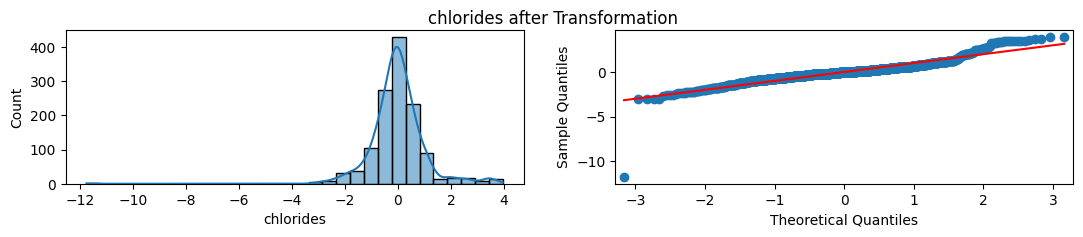

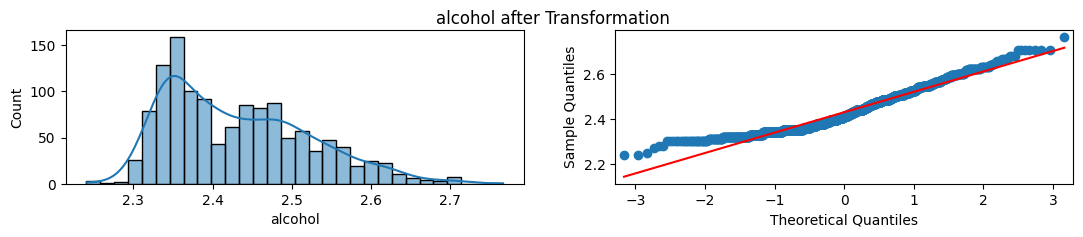

In [28]:
skewed_features_transformed = transformed_skewness[
    abs(transformed_skewness) > 0.5
].index

for feature in skewed_features_transformed:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 2))
    sns.histplot(X_train_transformed[feature], kde=True, bins=30, ax=ax1)
    qqplot(X_train_transformed[feature], line="s", ax=ax2)
    fig.suptitle(f"{feature} after Transformation")
    plt.show()

Even after transformation, outliers may persist, especially for features with heavy-tailed distributions.
Standardization scales features based on mean and standard deviation, so outliers can disproportionately affect the scaling process. Z-scores will be used to check outliers.

In [29]:
z_scores = X_train_transformed.apply(zscore)
print((z_scores > 3).sum())

fixed acidity            4
volatile acidity         5
citric acid              1
residual sugar           0
chlorides               22
free sulfur dioxide      0
total sulfur dioxide     0
density                  8
pH                       3
sulphates                2
alcohol                  8
dtype: int64


Out of Q-Q plot and Z-scores it is clear that **Clorides** and **Alcohol** has moderate skeweness and some remaining outliers, however they will be kept to avoid loss of meaning or interpretability.

### 3.3. Standartization transformation

1. Linear models (like linear regression) are sensitive to the scale of features. Standardizing ensures:
    - All features are on the same scale (mean=0, variance=1), preventing dominance by features with larger magnitudes.
    - Better numerical stability during computations.

2. While Box-Cox and log reduce skewness, it doesn’t necessarily ensure consistent scales across features. Standardization helps align them.

3. In case of usa algorithms like Logistic Regression, Support Vector Machines, or Neural Networks, standardization can:
    - Speed up convergence of gradient descent.
    - Improve model performance by maintaining consistent scales.

Standartization transforms data to be Normally distributed with the Mean 0, and variance 1.

$z = \frac{x-\mu}{\sigma}$

In [30]:
scaler = StandardScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
X_train_transformed_scaled = pd.DataFrame(
    X_train_transformed_scaled, columns=X_train_transformed.columns
)
scale_matrix = pd.DataFrame(
    {"mean": scaler.mean_, "std": scaler.scale_}, index=X_train_transformed.columns
)

### 3.4. Multicollinearity after transformations

After transformation, Multicolinearity will be checked again.

In [31]:
vif_after_transformation = pd.DataFrame(vif_calculation(X_train_transformed_scaled))
vif_after_transformation

,Feature,VIF
0,const,1.000
1,fixed acidity,7.104
2,volatile acidity,1.789
3,citric acid,2.889
4,residual sugar,1.890
5,chlorides,1.417
6,free sulfur dioxide,2.870
7,total sulfur dioxide,3.243
8,density,7.181
9,pH,3.198


VIF > 5 indicates potential multicollinearity that should be addressed.

## 4. Model fitting

### 4.1. Variable selection

In [32]:
spearman_corr = spearman_corr_results_df.T[["Correlation", "P-value"]].reset_index()
spearman_corr.columns = ["Feature", "Correlation", "P-value"]

vif_cleaned = vif_after_transformation[
    vif_after_transformation["Feature"] != "const"
].reset_index(drop=True)
combined_table = pd.merge(spearman_corr, vif_cleaned, on="Feature")

print(combined_table)

                 Feature  Correlation  P-value    VIF
0          fixed acidity        0.111    0.000  7.104
1       volatile acidity       -0.376    0.000  1.789
2            citric acid        0.203    0.000  2.889
3         residual sugar        0.036    0.198  1.890
4              chlorides       -0.189    0.000  1.417
5    free sulfur dioxide       -0.064    0.021  2.870
6   total sulfur dioxide       -0.214    0.000  3.243
7                density       -0.188    0.000  7.181
8                     pH       -0.046    0.102  3.198
9              sulphates        0.362    0.000  1.408
10               alcohol        0.489    0.000  3.482


VIF higher than 5 suggests that **Fixed Acidity** and **Density** should be excluded from the model.

In [55]:
X_train_transformed_scaled_model = X_train_transformed_scaled.copy()
X_train_transformed_scaled_model.drop(
    ["fixed acidity", "density"], axis=1, inplace=True
)
vif_after_variable_removal = vif_calculation(X_train_transformed_scaled_model)
vif_after_variable_removal

,Feature,VIF
0,const,1.000
1,volatile acidity,1.714
2,citric acid,2.289
3,residual sugar,1.139
4,chlorides,1.378
5,free sulfur dioxide,2.843
6,total sulfur dioxide,3.068
7,pH,1.637
8,sulphates,1.269
9,alcohol,1.473


After removing mentioned variables and recalculating VIF, there is no additional variables with VIF higher than 5, so all other variables will be left.


As for correlation, eventhough p-value for **Residual Sugar** and **pH** is lower than 0.05 what suggest not significant linear relationship. This alone is not sufficient to exclude variables from the model. A variable with a high p-value in correlation might:
- Have a non-linear relationship with the target, which correlation won't detect.
- Be important in combination with other variables even if its standalone effect is weak.

For independent variables which will be kept in model respective transformations were done:
- **Volatile Acidity** - Log and Standartization
- **Citric Acid** - Standartization
- **Residual Sugar** - Box-Cox and Standartization
- **Chlorides** - Box-Cox and Standartization
- **Free Sulfur Dioxid** - Log and Standartization
- **Total Sulfur Dioxide** - Log and Standartization
- **pH** - Standartization
- **Sulphates** - Box-Cox and Standartization
- **Alcohol** - Log and Standartization

Box-Cox or Log transformation was selected based on skeweness results.

### 4.2. Model selection

Eventhough **Quality** is measured in numerical values (from 0 to 10 in general cases, from 3 to 8 in this dataset) the purpose of it is categorical. Giving this and the ordinal nature of dependent variable **Quality** the first choice of the model would be **Ordinal Logistic Regression (OLR)**.

Why OLR?
- Respects the Ordinal Nature. OLR explicitly models the ordered nature of **Quality** categories, which provides more interpretable insights than models that treat categories as nominal.
- Works with Imbalanced Data. By combining sparse categories (if necessary) and using stratification, OLR can still provide meaningful results for imbalanced categories.
- Interpretability. OLR provides clear coefficients that quantify the relationship between predictors and the likelihood of being in a higher or lower category. This is useful for explaining quality in terms of the predictors.
- Practical for Explanation. Since goal includes understanding how predictors affect quality, OLR’s outputs (coefficients, odds ratios) are easier to explain compared to tree-based or multinomial models.

### 4.3. Ordinal Logistic Regression

**Quality** variable categories are imbalanced. **Quality** 3 and 8 is strongly underrepresented, and they will be combined with 4 and 7 respectively.

In [34]:
y_train_combined = y_train.copy().replace({3: 4, 8: 7})

In [35]:
model = OrderedModel(y_train_combined, X_train_transformed_scaled_model, distr="logit")
result = model.fit(method="bfgs", maxiter=500)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.898083
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
                             OrderedModel Results                             
Dep. Variable:                quality   Log-Likelihood:                -1148.6
Model:                   OrderedModel   AIC:                             2321.
Method:            Maximum Likelihood   BIC:                             2383.
Date:                Fri, 22 Nov 2024                                         
Time:                        18:18:26                                         
No. Observations:                1279                                         
Df Residuals:                    1267                                         
Df Model:                           9                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

P-value higher than 0.05 for variable **Residual Sugar** suggest that null hypothesis of coeficient being equal to 0 is failed to be rejected. This variable will be removed and model will be fitted again.

In [36]:
X_train_transformed_scaled_model2 = X_train_transformed_scaled_model.copy()
X_train_transformed_scaled_model2.drop("residual sugar", axis=1, inplace=True)

In [37]:
model2 = OrderedModel(
    y_train_combined, X_train_transformed_scaled_model2, distr="logit"
)
result2 = model2.fit(method="bfgs", maxiter=500)
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.898952
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
                             OrderedModel Results                             
Dep. Variable:                quality   Log-Likelihood:                -1149.8
Model:                   OrderedModel   AIC:                             2322.
Method:            Maximum Likelihood   BIC:                             2378.
Date:                Fri, 22 Nov 2024                                         
Time:                        18:18:27                                         
No. Observations:                1279                                         
Df Residuals:                    1268                                         
Df Model:                           8                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

### 4.4. Modeling results

#### 4.4.1. Log-Likelihood, AIC, BIC

1. The **Log-likelihood** is a measure of the likelihood of the observed data under the fitted model. It represents how well the model explains the observed outcomes. A higher (less negative) log-likelihood indicates a better fit because the model explains the data more accurately.
2. The **Akaike Information Criterion (AIC)** is a metric that evaluates the goodness of fit of a statistical model while penalizing model complexity (the number of parameters). A lower AIC indicates a better model, balancing goodness of fit and simplicity.
3. The **Bayesian Information Criterion (BIC)** is similar to AIC but applies a stronger penalty for the number of parameters, especially as the sample size increases. A lower BIC indicates a better model. BIC favors simpler models more aggressively than AIC, particularly for large datasets.

For adjusted model (Model number 2) Log-Likelihood, AIC and BIC are slightly worse compared to first Model:
- Model 1: Log-Likelihood: -1148.6, AIC: 2321, BIC: 2383
- Model 2: Log-Likelihood: -1149.8, AIC: 2322, BIC: 2378

However - the difference is not big, and BIC result is even better for Model 2. 

#### 4.4.2. Model hypothesis

Hypothesis stated: 

**Wines with higher alcohol content tend to have higher perceived quality.**

To test this null hipothesis will be defined as follows:

$H_0: Coef = 0 $ - Alcohol content has no significant relationship with wine quality. 

$H_a: Coef \neq 0 $ - Alcohol content has significant relationship with wine quality.

This Hypothesis is rejected as p-value for **Alcohol** parameter is lower than $\alpha$ = 0.05, and this means there is significant relationship between **Alcohol** and **Quality**.

#### 4.4.3. Pseudo $R^2$ values


Pseudo $R^2$ values are used in logistic and ordinal logistic regression as approximate measures of model fit. There are several commonly used pseudo $R^2$ formulas, and while they don’t represent the proportion of variance explained in the same way as traditional $R^2$ in linear regression, they provide insight into the model's explanatory power.
- McFadden's pseudo $R^2$ is based on the log-likelihood of the fitted model compared to the null model (a model with no predictors).
- Cox and Snell's pseudo $R^2$ is based on the likelihood ratio and is scaled to approach 1, but it does not reach 1 even for a perfect model.
- Nagelkerke’s pseudo $R^2$ is a modification of Cox and Snell’s $R^2$ to scale it between 0 and 1, providing a more interpretable value.

In [38]:
def r_squared(result, data):
    """
    Calculates Pseudo R² values for a model.

    This function computes McFadden's, Cox-Snell's, and Nagelkerke's
    pseudo R² metrics to evaluate model fit.

    Parameters
    ----------
    result : object
        A fitted model object with log-likelihood attributes (`llf` and `llnull`).
    data : array-like
        The dataset used for the model fitting.

    Outputs
    -------
    - McFadden's R²
    - Cox-Snell's R²
    - Nagelkerke's R²
    """
    lnL_full = result.llf
    lnL_null = result.llnull
    n = len(data)

    R2_McFadden = 1 - (lnL_full / lnL_null)
    R2_CoxSnell = 1 - (np.exp((lnL_null - lnL_full) * (2 / n)))
    R2_Nagelkerke = R2_CoxSnell / (1 - np.exp(lnL_null * (2 / n)))

    print(f"McFadden's R²: {R2_McFadden:.4f}")
    print(f"Cox-Snell R²: {R2_CoxSnell:.4f}")
    print(f"Nagelkerke R²: {R2_Nagelkerke:.4f}")

In [39]:
print("Model 1")
r_squared(result, y_train_combined)
print("\nModel 2")
r_squared(result2, y_train_combined)

Model 1
McFadden's R²: 0.2040
Cox-Snell R²: 0.3689
Nagelkerke R²: 0.4120

Model 2
McFadden's R²: 0.2032
Cox-Snell R²: 0.3678
Nagelkerke R²: 0.4108


Pseudo $R^2$ values are also very similar for both Models. 
It is safe to make conclution that removing variable **Residual Sugar** did not worsen the model. There for, Model 2 will be selected.

#### 4.4.4. Model coefficients and their interpretation. Standartized scale. Log-odds

Log-odds interpretation is a fundamental concept in statistics, particularly in logistic regression and probability modeling. It provides a way to express probabilities in a linear form, which is useful for modeling relationships between variables.

Why Use Log-Odds?
- Linearity: Probabilities themselves are non-linear, meaning they don’t have a simple additive or multiplicative relationship with predictors. By converting probabilities to log-odds, the relationship becomes linear, making it easier to model using regression techniques.
- Interpretable Coefficients: In logistic regression, coefficients represent the change in the log-odds for a one-unit change in the predictor variable.

OLR modeling provides results for coefficients for independednt variables and threshholds (intercept) for changing between respective groups.

The coefficients are changes in log-odds, not probabilities. Probabilities van be computed by combining the thresholds, coefficients, and predictor values.

In [40]:
coefficients = result2.params
coefficients = coefficients.to_frame(name="coef")
ci = result2.conf_int()
ci.columns = ["lower", "upper"]
model_results = pd.concat([coefficients, ci], axis=1)
model_results

,coef,lower,upper
volatile acidity,-0.561718,-0.712627,-0.410808
citric acid,-0.182608,-0.347921,-0.017294
chlorides,-0.176867,-0.307326,-0.046408
free sulfur dioxide,0.294927,0.105740,0.484114
total sulfur dioxide,-0.470355,-0.668461,-0.272249
pH,-0.306110,-0.450605,-0.161615
sulphates,0.561821,0.433229,0.690413
alcohol,0.932128,0.789390,1.074865
4/5,-4.071778,-4.387713,-3.755843
5/6,1.327463,1.242109,1.412817


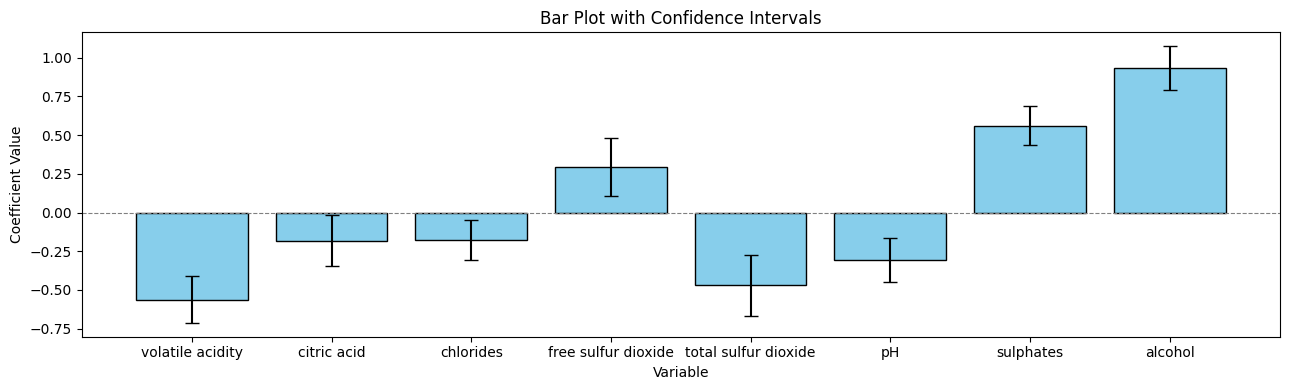

In [41]:
model_r = model_results.copy()
model_r.drop(["4/5", "5/6", "6/7"], axis=0, inplace=True)

plt.figure(figsize=(13, 4))
bars = plt.bar(
    model_r.index,
    model_r["coef"],
    yerr=[model_r["coef"] - model_r["lower"], model_r["upper"] - model_r["coef"]],
    capsize=5,
    color="skyblue",
    edgecolor="black",
)

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.title("Bar Plot with Confidence Intervals")
plt.ylabel("Coefficient Value")
plt.xlabel("Variable")

plt.tight_layout()
plt.show()

##### Summary

Independent variables which have possitive effect on **Quality**:
- **Alcohol** - 0.93 - strongest association.
- **Sulphates** - 0.56 - moderate association.
- **Free Sulfur Dioxide** - 0.29

Independent variables which have negative effect on **Quality**:
- **Volatile acidity** - -0.56 - moderate association.
- **Total Sulfur Dioxid** - -0.47 - moderate association.
- **pH** - -0.31
- **Citric Acid** - -0.18 - weak association.
- **Chlorides** - -0.18 - weak association.


Direction of Relationships:
- Positive coefficients indicate factors that improve the chances of higher wine quality (e.g., alcohol, sulphates).
- Negative coefficients indicate factors that decrease the chances of higher wine quality (e.g., volatile acidity, total sulfur dioxide).

Thresholds Interpretation
The thresholds (4/5, 5/6, 6/7) represent the boundaries between the cumulative probabilities of wine quality ratings:
- 4/5: The log-odds of a wine being rated 4 or lower versus being rated 5 or higher.
- 5/6: The log-odds of a wine being rated 5 or lower versus being rated 6 or higher.
- 6/7: The log-odds of a wine being rated 6 or lower versus being rated 7 or higher.

Eventhought estimated coefficients have p-value <0.05 what means that coefficients are statistically significant it doesn't mean that in the dataset had exact that association to dependent variable. Here comes **Confidens intervals** which show what is the potential range for coefficient with 95% confidence.

#### 4.4.5. Model coefficients and their interpretation. Original scale

Standartized scale is beneficial to be able to compare coefficient results. However for meaningful interpretation Original scale is better.

Parameters will be transformed back. Firstly unstandartization, secondly Box-Cox or Log transformation depending on variable.

In [42]:
def inverse_boxcox(coef, lam):
    """
    Reverses a Box-Cox transformation.

    Parameters
    ----------
    coef : float or array-like
        Transformed value(s) to be reversed.
    lam : float
        Lambda parameter used in the Box-Cox transformation.

    Returns
    -------
    float or array-like
        Original value(s) after reversing the Box-Cox transformation.
    """
    if lam == 0:
        return np.exp(coef)
    else:
        return (lam * coef + 1) ** (1 / lam)

In [43]:
def unstandardize(row):
    """
    Reverts standardization for coefficients and confidence intervals.

    Parameters
    ----------
    row : pandas.Series
        A row containing standardized coefficients and intervals.

    Returns
    -------
    pandas.Series
        The row with unstandardized coefficients and confidence intervals.
    """
    variable = row.name
    if variable in scale_matrix.index:
        factor = scale_matrix.loc[variable, "std"]
        row["coef_original"] = row["coef"] * factor
        row["lower_original"] = row["lower"] * factor
        row["upper_original"] = row["upper"] * factor
    return row

In [44]:
model_results_standartized = model_results.copy()
model_results = model_results.apply(unstandardize, axis=1)

for idx, row in model_results.iterrows():
    variable = row.name
    if variable in boxcox_features:
        lam_row = boxcox[boxcox["feature"] == variable]
        if not lam_row.empty:
            lam = lam_row["box_cox_lambda"].values[0]
            model_results.at[idx, "coef_original"] = inverse_boxcox(
                row["coef_original"], lam
            )
            model_results.at[idx, "lower_original"] = inverse_boxcox(
                row["lower_original"], lam
            )
            model_results.at[idx, "upper_original"] = inverse_boxcox(
                row["upper_original"], lam
            )
    elif variable in log_features:
        model_results.at[idx, "coef_original"] = np.exp(row["coef_original"]) - 1
        model_results.at[idx, "lower_original"] = np.exp(row["lower_original"]) - 1
        model_results.at[idx, "upper_original"] = np.exp(row["upper_original"]) - 1


print("Transformed Back to Original Scale:")
model_results = model_results[
    ["coef", "lower", "upper", "coef_original", "lower_original", "upper_original"]
]
model_results

Transformed Back to Original Scale:


,coef,lower,upper,coef_original,lower_original,upper_original
volatile acidity,-0.561718,-0.712627,-0.410808,-0.061827,-0.077776,-0.045603
citric acid,-0.182608,-0.347921,-0.017294,-0.035577,-0.067784,-0.003369
chlorides,-0.176867,-0.307326,-0.046408,0.845188,0.754027,0.955251
free sulfur dioxide,0.294927,0.105740,0.484114,0.201566,0.068051,0.351772
total sulfur dioxide,-0.470355,-0.668461,-0.272249,-0.275931,-0.367994,-0.170458
pH,-0.306110,-0.450605,-0.161615,-0.046388,-0.068285,-0.024491
sulphates,0.561821,0.433229,0.690413,2.526214,1.837735,4.239399
alcohol,0.932128,0.789390,1.074865,0.087907,0.073961,0.102034
4/5,-4.071778,-4.387713,-3.755843,NaN,NaN,NaN
5/6,1.327463,1.242109,1.412817,NaN,NaN,NaN


Change in coefficients may seem extreme on th first look, however original scale has to be taken in to account.

Couple variables will be selected for detailed look.

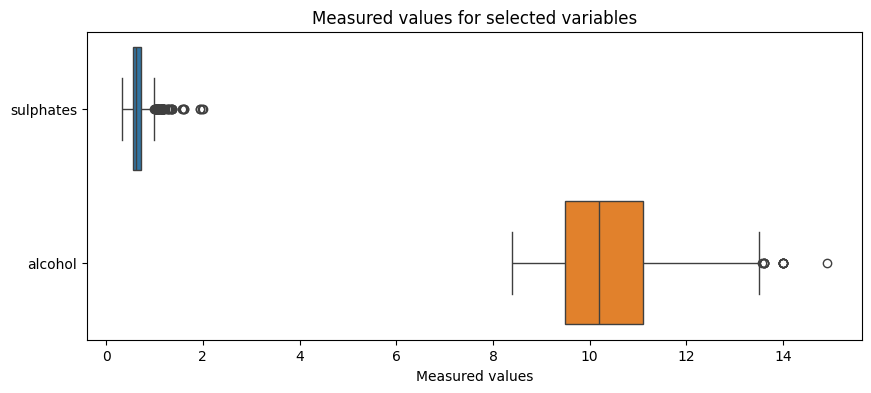

In [45]:
plt.figure(figsize=(10, 4))
sns.boxplot(df[["sulphates", "alcohol"]], orient="h")
plt.title("Measured values for selected variables")
plt.xlabel("Measured values")

plt.show()

A one-unit increase in **Sulphates** increases wine quality by 2.53 if all other variables stay the same. This may seem a lot, however having in mind **Sulphates** scale, that big change (one unit) is very unlikable and in usual cases, effect should not be that strong.

A one-unit increse in **Alcohol** increases wine quality by 0,088 if all other variables stay the same. Having in mind **Alcohol** scale, just changing **Alcohol** from 9 to 15 could increase **Quality** by 6 * 0,088 = 0.528 when all other variables stay the same.

#### 4.4.6. Model simulation

To visualize Model results simulation was done. Goal was to see, how probability, that wine is in specific **Quality** level depends on **Alcohol** level. Steps:
- All variables except **Alcohol** were fixed at their mean value. As Model was created using standartized data - mean = 0.
- **Alcohol** values were generated in standartized range from -2.5 to 4.
- Probabilities were calculated by Model prediction.
- **Alcohol** values were transformed back to original scale for better interpretability.

In [46]:
simulation = {
    key: [0] * 14
    for key in [
        "volatile acidity",
        "citric acid",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "pH",
        "sulphates",
    ]
}
simulation["alcohol"] = np.arange(-2.5, 4.5, 0.5)

simulation = pd.DataFrame(simulation)
simulation_results = result2.predict(simulation)
simulation_results = simulation_results.set_axis(["4", "5", "6", "7"], axis=1)

simulation_results["alcohol_original"] = (
    np.exp(
        simulation["alcohol"] * scale_matrix.loc["alcohol", "std"]
        + scale_matrix.loc["alcohol", "mean"]
    )
    - 1
)

simulation_results_df = simulation_results.melt(
    id_vars="alcohol_original",
    value_vars=["4", "5", "6", "7"],
    value_name="probability",
    var_name="quality",
)

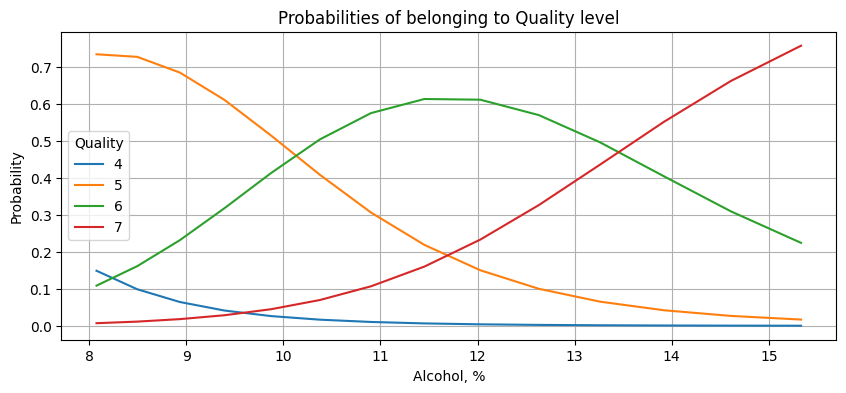

In [47]:
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=simulation_results_df,
    x="alcohol_original",
    y="probability",
    hue="quality",
)

plt.title("Probabilities of belonging to Quality level")
plt.xlabel("Alcohol, %")
plt.ylabel("Probability")
plt.legend(title="Quality")
plt.grid(True)

plt.show()

- Graph shows tendency of possitive relationship between **ALcohol** and **Quality**.
- Breakpoints show that up till ~10 % highest probability is for **Quality** = 5. From ~10 % to ~13.5 % highest probability is for **Quality** = 6, and above 13.5 % **Quallity** = 7.

#### 4.4.7. Check for model accuracy

To check model accuracy, test data will be used.

First of all, all the same transformations (Box-Cox / Log and Standartization) will be appliet to independent variables.

In [48]:
X_test_transformed = X_test.copy()
X_test_transformed.drop(
    ["fixed acidity", "density", "residual sugar"], axis=1, inplace=True
)

pt = PowerTransformer(method="box-cox")
for feature in boxcox_features:
    X_train_transformed[feature] = pt.fit_transform(X_train[[feature]])
for feature in log_features:
    X_train_transformed[feature] = np.log1p(X_train_transformed[feature])

X_test_transformed_scaled = scaler.fit_transform(X_test_transformed)
X_test_transformed_scaled = pd.DataFrame(
    X_test_transformed_scaled, columns=X_test_transformed.columns
)
y_test_combined = y_test.copy().replace({3: 4, 8: 7})

In [56]:
def model_accuracy(result, x, y):
    """
    Evaluates model performance and displays accuracy metrics.

    This function computes a confusion matrix, classification report,
    and accuracy score for a given model. It assumes the model outputs
    cumulative probabilities, which are converted to discrete probabilities
    to predict classes.

    Parameters
    ----------
    result : object
        A fitted model with a `predict` method.
    x : array-like
        Feature matrix for predictions.
    y : array-like
        True class labels.

    Outputs
    -------
    - Confusion matrix (counts and percentages).
    - Classification report (precision, recall, F1-score).
    - Overall accuracy score.

    """
    cumulative_probs = result.predict(x)
    discrete_probs = np.diff(
        np.hstack([np.zeros((cumulative_probs.shape[0], 1)), cumulative_probs]), axis=1
    )
    predicted_classes = np.argmax(discrete_probs, axis=1) + 4

    cm = confusion_matrix(y, predicted_classes)
    cm = pd.DataFrame(
        cm,
        index=["4-real", "5-real", "6-real", "7-real"],
        columns=["4-predict", "5-predict", "6-predict", "7-predict"],
    )
    cm_percent = (cm.T / cm.sum(axis=1)).T.round(3)

    print("Confusion matrix:\n", cm)
    print("\nConfusion matrix, %:\n", cm_percent)
    print("\nClassification report:\n", classification_report(y, predicted_classes))
    print("\nAccuracy score:", accuracy_score(y, predicted_classes))

In [57]:
model_accuracy(result2, X_train_transformed_scaled_model2, y_train_combined)

Confusion matrix:
         4-predict  5-predict  6-predict  7-predict
4-real          1         44          5          0
5-real          3        481         59          2
6-real          0        273        231          6
7-real          0         18        142         14

Confusion matrix, %:
         4-predict  5-predict  6-predict  7-predict
4-real      0.020      0.880      0.100      0.000
5-real      0.006      0.883      0.108      0.004
6-real      0.000      0.535      0.453      0.012
7-real      0.000      0.103      0.816      0.080

Classification report:
               precision    recall  f1-score   support

           4       0.25      0.02      0.04        50
           5       0.59      0.88      0.71       545
           6       0.53      0.45      0.49       510
           7       0.64      0.08      0.14       174

    accuracy                           0.57      1279
   macro avg       0.50      0.36      0.34      1279
weighted avg       0.56      0.57      0.52

In [58]:
model_accuracy(result2, X_test_transformed_scaled, y_test_combined)

Confusion matrix:
         4-predict  5-predict  6-predict  7-predict
4-real          1         11          1          0
5-real          2        115         19          0
6-real          0         67         61          0
7-real          0          3         36          4

Confusion matrix, %:
         4-predict  5-predict  6-predict  7-predict
4-real      0.077      0.846      0.077      0.000
5-real      0.015      0.846      0.140      0.000
6-real      0.000      0.523      0.477      0.000
7-real      0.000      0.070      0.837      0.093

Classification report:
               precision    recall  f1-score   support

           4       0.33      0.08      0.12        13
           5       0.59      0.85      0.69       136
           6       0.52      0.48      0.50       128
           7       1.00      0.09      0.17        43

    accuracy                           0.57       320
   macro avg       0.61      0.37      0.37       320
weighted avg       0.61      0.57      0.52

##### Summary

- Model accuracy score is almost the same for **Train** (0.568) and **Test** (0.565) data.
- Confusion matrix shows slightly better clasification for **Test** data.
- Classification report results are very similar for **Train** and **Test** data.

## 5. Suggestions for additional analysis and improvement

- Multinomial Logistic regression with weights to solve class imbalance.
- For simplified decision - Logistic Regression with 2 classes, e.g. "Good", and "Bad".
- Linear Regression for prediction of wine **Quality**.
- Ensure that the analysis accounts for potential multiple testing (using methods like Bonferroni correction) if many variables are assessed simultaneously.
- Additionl information about exact type of wine would add clarity to duplicates part. For current analysis duplicates were kept, as there was no clear evidence that these are the same values.
- Investigate effect of outliers, by capping them at some level if that could make **Quality** level differ from each other.